# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





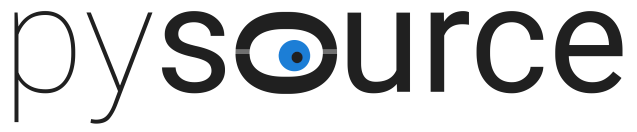

## **1. Installation**

Load your dataset

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/Mask_RCNN
import sys
sys.path.append("/content/Mask_RCNN/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

In [ ]:
!nvidia-smi

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
# Extract Images
images_path = "images.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

In [ ]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)